In [1]:
%matplotlib inline
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.callbacks import EarlyStopping
from keras.engine import Model
from keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout, Flatten, Conv2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

temp_image_data_folder = 'F:\\mnist\\temp_image_data'


Using TensorFlow backend.


In [2]:
base_model = InceptionV3(include_top=False, input_shape=(150, 150, 3))
base_model.summary()
for layer in base_model.layers:
    layer.trainable = False
    
# Add the fully-connected layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
# add a fully-connected layer
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
# and a fully connected output/classification layer
predictions = Dense(10, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])    

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 150, 150, 3)   0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 74, 74, 32)    864         input_1[0][0]                    
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, 74, 74, 32)    96          conv2d_1[0][0]                   
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 74, 74, 32)    0           batch_normalization_1[0][0]      
___________________________________________________________________________________________

____________________________________________________________________________________________________
batch_normalization_38 (BatchNor (None, 7, 7, 128)     384         conv2d_38[0][0]                  
____________________________________________________________________________________________________
activation_33 (Activation)       (None, 7, 7, 128)     0           batch_normalization_33[0][0]     
____________________________________________________________________________________________________
activation_38 (Activation)       (None, 7, 7, 128)     0           batch_normalization_38[0][0]     
____________________________________________________________________________________________________
average_pooling2d_4 (AveragePool (None, 7, 7, 768)     0           mixed3[0][0]                     
____________________________________________________________________________________________________
conv2d_31 (Conv2D)               (None, 7, 7, 192)     147456      mixed3[0][0]            

In [3]:
train_dg = ImageDataGenerator()
train_flow = train_dg.flow_from_directory(temp_image_data_folder + "\\train", target_size=(150, 150))

valid_dg = ImageDataGenerator()
valid_flow = valid_dg.flow_from_directory(temp_image_data_folder + "\\valid", target_size=(150, 150))

model.fit_generator(train_flow, 300, epochs=10, verbose=0, 
                    validation_data=valid_flow, validation_steps=100)

Found 45001 images belonging to 10 classes.
Found 15000 images belonging to 10 classes.


In [9]:
layer_outputs = [layer.output for layer in model.layers[:40] if isinstance(layer, Conv2D)]

test_im = Image.open(temp_image_data_folder + "\\valid\\0\\image-5.png")
activation_model = Model(inputs=model.input, outputs=layer_outputs)
test_im = np.asarray(test_im).reshape(1, 150, 150, 3)
activations = activation_model.predict(test_im)

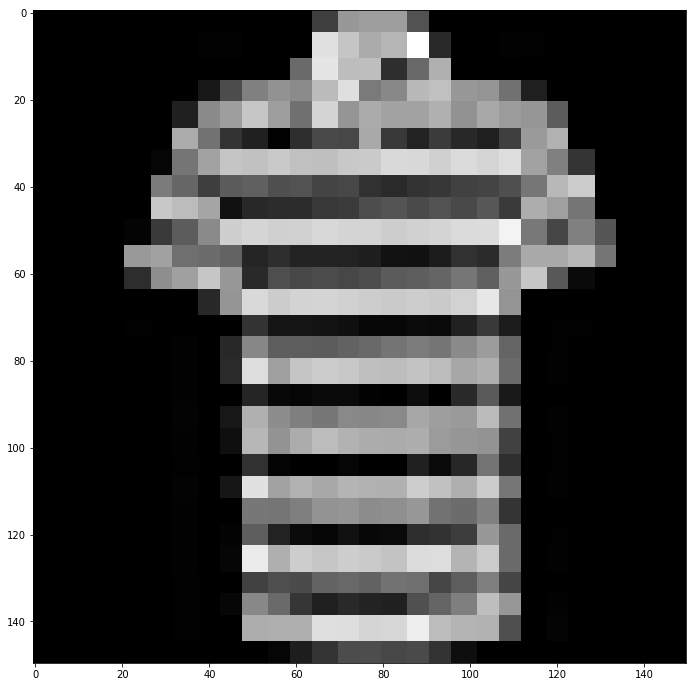

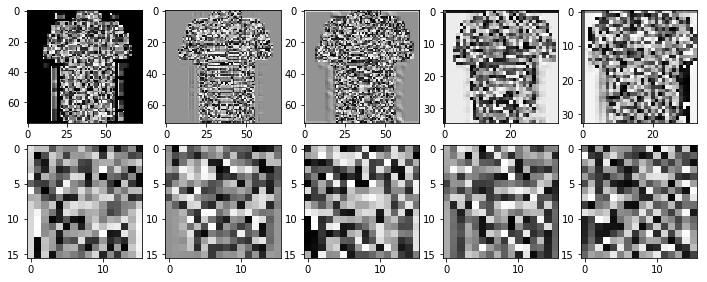

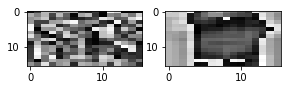

In [13]:
plt.rcParams["figure.figsize"] = [12, 12]
plt.imshow(test_im[0, :, :, :])
fig = plt.figure()
row = 1
for i, layer_activation in enumerate(activations):
    if i % 10 == 0 and i > 0:        
        row += 1
        fig = plt.figure()
    image_data = layer_activation[0, :, :, 0]
    image_data = np.dstack((image_data, image_data, image_data))
    
    fig.add_subplot(row * 5, 5, i+1)
    plt.imshow(image_data, aspect='auto')
    